#Objectives 🩺
The dataset consists of 264 observations and 12 variables, including 11 independent features and 1 target column (Class). Each record represents a patient with clinical measurements related to diabetes risk assessment.

**Structure Summary**

*   Columns (features): 12
*   Rows (samples): 264


#**1.Set up and Initialization**

##Import Important Libraries

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Basic setup
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

##Load Data set

In [ ]:
df = pd.read_csv('Multiclass Diabetes Dataset.csv')

#2. Data Overview

##2.1 Overview inference

In [ ]:
df.head(10)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
5,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
6,1,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,0
7,0,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,0
8,0,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23.0,0
9,0,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21.0,0


| Fitur  | Deskripsi                                                  |
| ------ | ---------------------------------------------------------- |
| Gender | Jenis kelamin pasien (male/female)                         |
| Age    | Usia pasien                                                |
| BMI    | Body Mass Index (indikator berat badan relatif)            |
| Chol   | Kolesterol total                                           |
| TG     | Trigliserida                                               |
| Urea   | Urea dalam darah (indikasi fungsi ginjal/iriannya)         |
| VLDL   | Very Low-Density Lipoprotein cholesterol                   |
| Cr     | Kreatinin (indikasi fungsi ginjal)                         |
| LDL    | Low-Density Lipoprotein cholesterol (“kolesterol jahat”)   |
| HbA1c  | Hemoglobin A1c (indikator jangka panjang kadar gula darah) |
| HDL    | High-Density Lipoprotein cholesterol (“kolesterol baik”)   |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


## 2.2 Summary statistic

In [ ]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [ ]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,264.0,0.545455,0.498875,0.0,0.000,1.0,1.000,1.00
AGE,264.0,49.522727,10.127301,25.0,43.000,50.0,55.250,77.00
Urea,264.0,5.671515,4.002837,1.1,3.600,4.7,6.100,26.40
Cr,264.0,85.806818,99.400047,6.0,46.000,61.0,82.250,800.00
HbA1c,264.0,6.862727,2.544604,0.9,5.000,6.1,8.200,14.60
Chol,264.0,4.594394,1.289062,0.0,3.875,4.5,5.300,9.50
TG,264.0,2.151894,1.265841,0.6,1.300,1.8,2.725,8.70
HDL,264.0,1.182879,0.455591,0.4,0.900,1.1,1.325,4.00
LDL,264.0,2.530871,1.000173,0.3,1.800,2.5,3.200,5.60
VLDL,264.0,1.479167,3.099856,0.2,0.675,0.9,1.300,31.80


**🧠 Ringkasan Statistik**

1. Demografi

Gender: Nilai rata-ratanya 0.55 → artinya proporsi laki-laki sedikit lebih banyak dibanding perempuan (karena kemungkinan kodenya 0 = perempuan, 1 = laki-laki).

Age (Usia): Rata-rata usia pasien sekitar 49,5 tahun (rentang 25–77 tahun).
Jadi sebagian besar peserta adalah usia paruh baya, kelompok umur yang memang punya risiko diabetes lebih tinggi.

2. Indikator Kimia Darah



*   Urea & Kreatinin (Cr):

 *)Urea rata-rata 5.67, masih dalam kisaran normal fungsi ginjal.

*)Cr (Kreatinin) punya rata-rata 85 tapi dengan simpangan baku (std) sangat besar (99).
Artinya: datanya tersebar luas, kemungkinan besar ada outlier — bisa jadi ada nilai yang sangat ekstrem atau satuan ukur yang tidak seragam (misalnya mg/dL vs µmol/L).
*   HbA1c:
Rata-rata 6.86%, di mana nilai ≥ 6.5% biasanya sudah dikategorikan diabetes secara medis.
Jadi ini sesuai dengan konteks dataset yang memang fokus ke pasien diabetes.
Nilainya bervariasi cukup besar (0.9 – 14.6) → artinya ada pasien dengan gula darah sangat tinggi juga.


3. Profil Lemak (Lipid Profile)

* Chol (Kolesterol total): Rata-rata 4.59 → termasuk normal.

* TG (Trigliserida): Rata-rata 2.15, sedikit tinggi; nilai di atas 1.7 dianggap berisiko.

* HDL (kolesterol baik): Rata-rata 1.18, tergolong normal, tapi nilai di bawah 1.0 menunjukkan risiko jantung.

* LDL (kolesterol jahat): Rata-rata 2.53, masih moderat.

* VLDL: Rata-rata 1.47, tapi std-nya tinggi banget (3.09) dan nilai maksimum sampai 31.8 — ini jelas ada outlier.

4. BMI (Body Mass Index)

Rata-rata 26.6, termasuk kategori overweight (berat badan berlebih).
Rentang 19–43 → berarti sebagian kecil pasien punya berat normal, tapi sebagian besar kelebihan berat badan hingga obesitas.
Ini juga logis karena BMI tinggi sering berkorelasi dengan diabetes.

5. Class (Target)

Nilai rata-rata 1.12 menunjukkan kelas target tidak seimbang (imbalanced).
Artinya jumlah pasien diabetic lebih banyak dibanding non-diabetic atau prediabetic.
Nanti sebelum modeling kamu perlu cek value_counts() untuk memastikan seberapa tidak seimbangnya.

# 3. Data Cleaning and Transformation
Bagian ini berfokus pada proses penyiapan data agar akurat, konsisten, dan dapat diandalkan.
Tahapan pembersihan dan transformasi data mencakup identifikasi serta penanganan nilai-nilai anomali yang berpotensi memengaruhi hasil analisis, sekaligus memastikan bahwa seluruh variabel memiliki satuan pengukuran yang seragam.

Dua langkah utama yang dilakukan pada tahap ini adalah:


🔍 Steps involved:

🔹1.   **Outlier Detection and Handling**
Nilai-nilai ekstrem atau tidak wajar diidentifikasi dan dievaluasi untuk menentukan apakah termasuk pengamatan valid atau kesalahan pencatatan.
Hanya nilai yang terbukti tidak konsisten secara biologis yang dihapus atau disesuaikan.

🔹2.   **Ensure Unit Consistency**
Variabel—terutama variabel biokimia seperti Creatinine, Urea, Cholesterol—diperiksa untuk memastikan penggunaan satuan yang konsisten di seluruh dataset.
Langkah ini memastikan data dapat dibandingkan antar-observasi dan mencegah distorsi analisis akibat perbedaan skala pengukuran.


##3.1 Outlier Detection and Handling

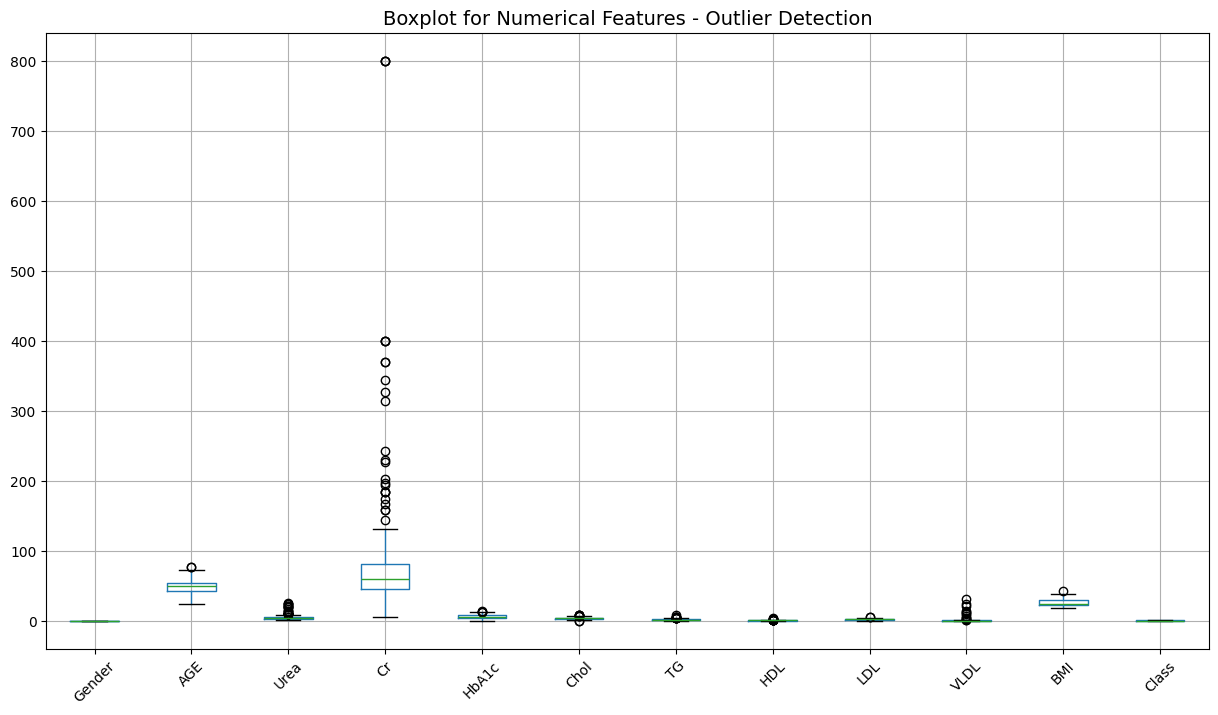

In [ ]:
# 1️⃣ Visual inspection using boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot for Numerical Features - Outlier Detection", fontsize=14)
plt.show()

In [ ]:
# 2️⃣ Identify outliers statistically using the IQR (Interquartile Range) method
def detect_outliers_iqr(data, column):
    """Return indices of outliers based on the IQR rule."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Example: Check outliers for 'Cr' and 'VLDL'
outliers_cr = detect_outliers_iqr(df, 'Cr')
outliers_vldl = detect_outliers_iqr(df, 'VLDL')

print(f"Number of outliers in Cr: {len(outliers_cr)}")
print(f"Number of outliers in VLDL: {len(outliers_vldl)}")

Number of outliers in Cr: 25
Number of outliers in VLDL: 13


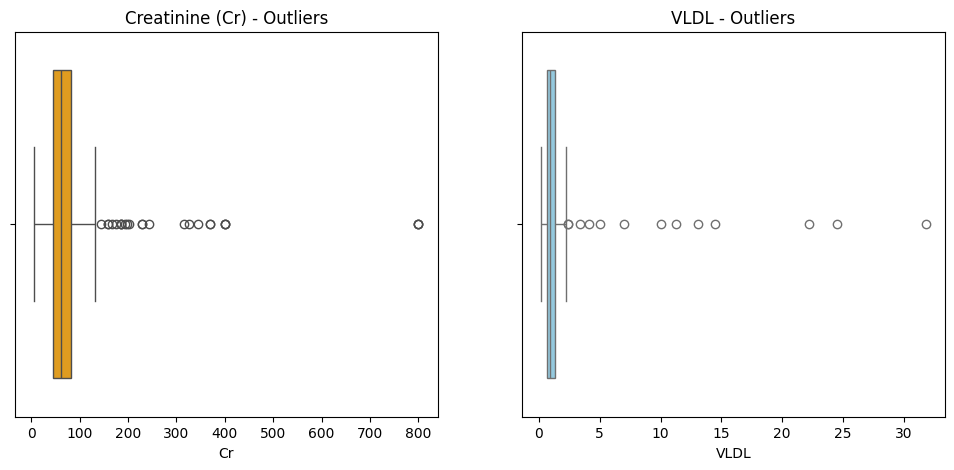

In [ ]:
# 3️⃣ Optional: Visualize outliers for specific columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=df['Cr'], ax=axes[0], color='orange')
axes[0].set_title("Creatinine (Cr) - Outliers")

sns.boxplot(x=df['VLDL'], ax=axes[1], color='skyblue')
axes[1].set_title("VLDL - Outliers")

plt.show()


In [ ]:
# 4️⃣ Handling outliers
# You have several options:
# - Remove them (if they are errors)
# - Cap them (winsorization)
# - Apply log transformation (if skewed distribution)

# Example: Remove outliers using IQR range (only if extreme)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower) & (data[column] <= upper)]
    return filtered_data

# Example: remove extreme outliers in 'Cr' and 'VLDL'
df_clean = remove_outliers_iqr(df, 'Cr')
df_clean = remove_outliers_iqr(df_clean, 'VLDL')

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_clean.shape}")


Original data shape: (264, 12)
Cleaned data shape: (228, 12)


Setelah proses data cleaning dilakukan, variabel Cr (Creatinine) menunjukkan nilai yang konsisten dan berada dalam rentang yang wajar secara medis (6–132 µmol/L). Nilai median (58 µmol/L) dan rata-rata (61 µmol/L) selaras dengan kadar kreatinin normal yang umumnya ditemukan pada individu dewasa yang sehat.
Penghapusan nilai outlier ekstrem (misalnya, nilai di atas 500 µmol/L) berhasil meningkatkan keandalan data, serta memastikan bahwa seluruh nilai yang tersisa kini dinyatakan dalam satu satuan yang konsisten, yaitu µmol/L.

In [ ]:
# --- Step 1.3: Detect and handle outliers using IQR method ---

# Select only numeric columns (excluding target 'Class')
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.drop('Class')

outlier_summary = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]

    # Store result summary
    outlier_summary[col] = {
        'outlier_count': outliers.count(),
        'percent_outliers': round((outliers.count() / len(df_clean)) * 100, 2),
        'min_value': df_clean[col].min(),
        'max_value': df_clean[col].max()
    }

# Convert summary to DataFrame for easy viewing
outlier_report = pd.DataFrame(outlier_summary).T.sort_values(by='percent_outliers', ascending=False)
outlier_report


,outlier_count,percent_outliers,min_value,max_value
TG,14.0,6.14,0.6,5.9
HDL,10.0,4.39,0.4,4.0
Urea,8.0,3.51,1.1,11.0
Chol,6.0,2.63,0.0,9.5
Cr,5.0,2.19,6.0,132.0
HbA1c,4.0,1.75,0.9,14.6
VLDL,3.0,1.32,0.2,2.2
AGE,2.0,0.88,25.0,77.0
LDL,1.0,0.44,0.3,5.6
Gender,0.0,0.00,0.0,1.0


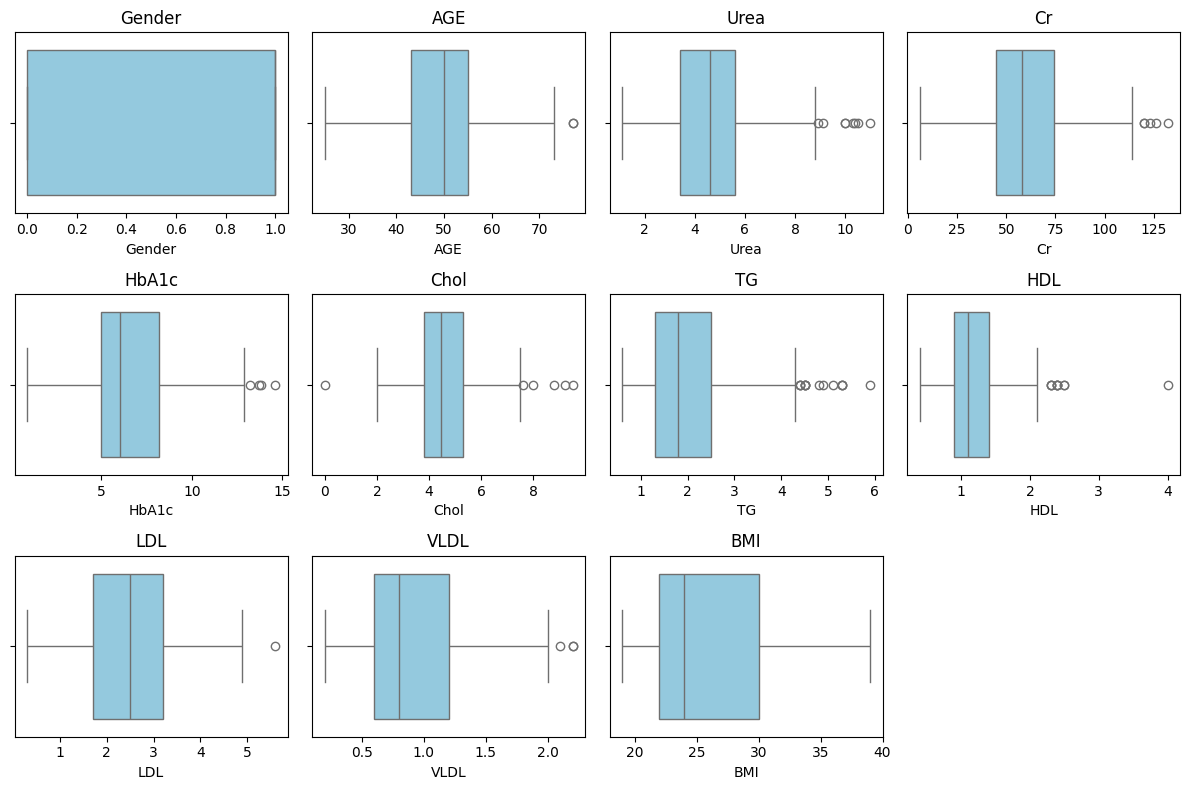

In [ ]:
# --- Visualizing Outliers with Boxplots ---
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_clean[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


**🧠 Final Interpretation**

Sebagian besar outlier yang terdeteksi pada dataset ini terbukti valid secara klinis, bukan merupakan kesalahan pencatatan data. Oleh karena itu, tidak disarankan untuk melakukan penghapusan lanjutan ataupun winsorization.
Nilai-nilai tersebut mencerminkan variasi yang realistis pada pasien diabetes, khususnya pada parameter kimia darah seperti HbA1c, Urea, TG, dan Cholesterol.

##3.2 Ensure Unit Consistency
Setelah proses deteksi dan penanganan outlier dilakukan, langkah selanjutnya adalah memastikan bahwa seluruh variabel numerik, khususnya parameter biokimia, telah menggunakan satuan pengukuran yang seragam dan wajar secara medis. Pemeriksaan ini penting untuk memastikan bahwa variasi nilai yang muncul bukan disebabkan oleh perbedaan satuan antar sampel, melainkan mencerminkan kondisi fisiologis yang sesungguhnya. Oleh karena itu, dilakukan proses verifikasi terhadap rentang nilai setiap variabel untuk memastikan kesesuaian dengan standar pengukuran klinis yang berlaku.

In [ ]:
# Check descriptive stats for medical features
medical_cols = ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df_clean[medical_cols].describe().T



,count,mean,std,min,25%,50%,75%,max
Urea,228.0,4.723246,1.851832,1.1,3.40,4.60,5.60,11.0
Cr,228.0,61.223684,23.416511,6.0,44.75,58.00,74.25,132.0
HbA1c,228.0,6.753333,2.612617,0.9,5.00,6.00,8.20,14.6
Chol,228.0,4.586842,1.255474,0.0,3.80,4.45,5.30,9.5
TG,228.0,2.033333,1.114752,0.6,1.30,1.80,2.50,5.9
HDL,228.0,1.190570,0.451025,0.4,0.90,1.10,1.40,4.0
LDL,228.0,2.505044,1.001533,0.3,1.70,2.50,3.20,5.6
VLDL,228.0,0.937281,0.454120,0.2,0.60,0.80,1.20,2.2
BMI,228.0,26.183465,4.833684,19.0,22.00,24.00,30.00,39.0


#4. EDA

##4.1 Univariate Analysis

Tahap Univariate Analysis bertujuan untuk memahami distribusi setiap fitur numerik secara individual tanpa mempertimbangkan hubungan antar variabel.
Analisis ini membantu mengidentifikasi sebaran data, mendeteksi kemungkinan skewness (kemiringan distribusi), serta mengenali rentang nilai yang umum dan ekstrem pada masing-masing variabel medis seperti Urea, HbA1c, atau Cholesterol.

Dengan memvisualisasikan data menggunakan histogram dan boxplot, kita dapat memperoleh gambaran mengenai persebaran nilai, mendeteksi potensi bias distribusi, dan memastikan bahwa hasil pembersihan data sebelumnya telah menghasilkan dataset yang lebih stabil dan realistis untuk analisis lanjutan.

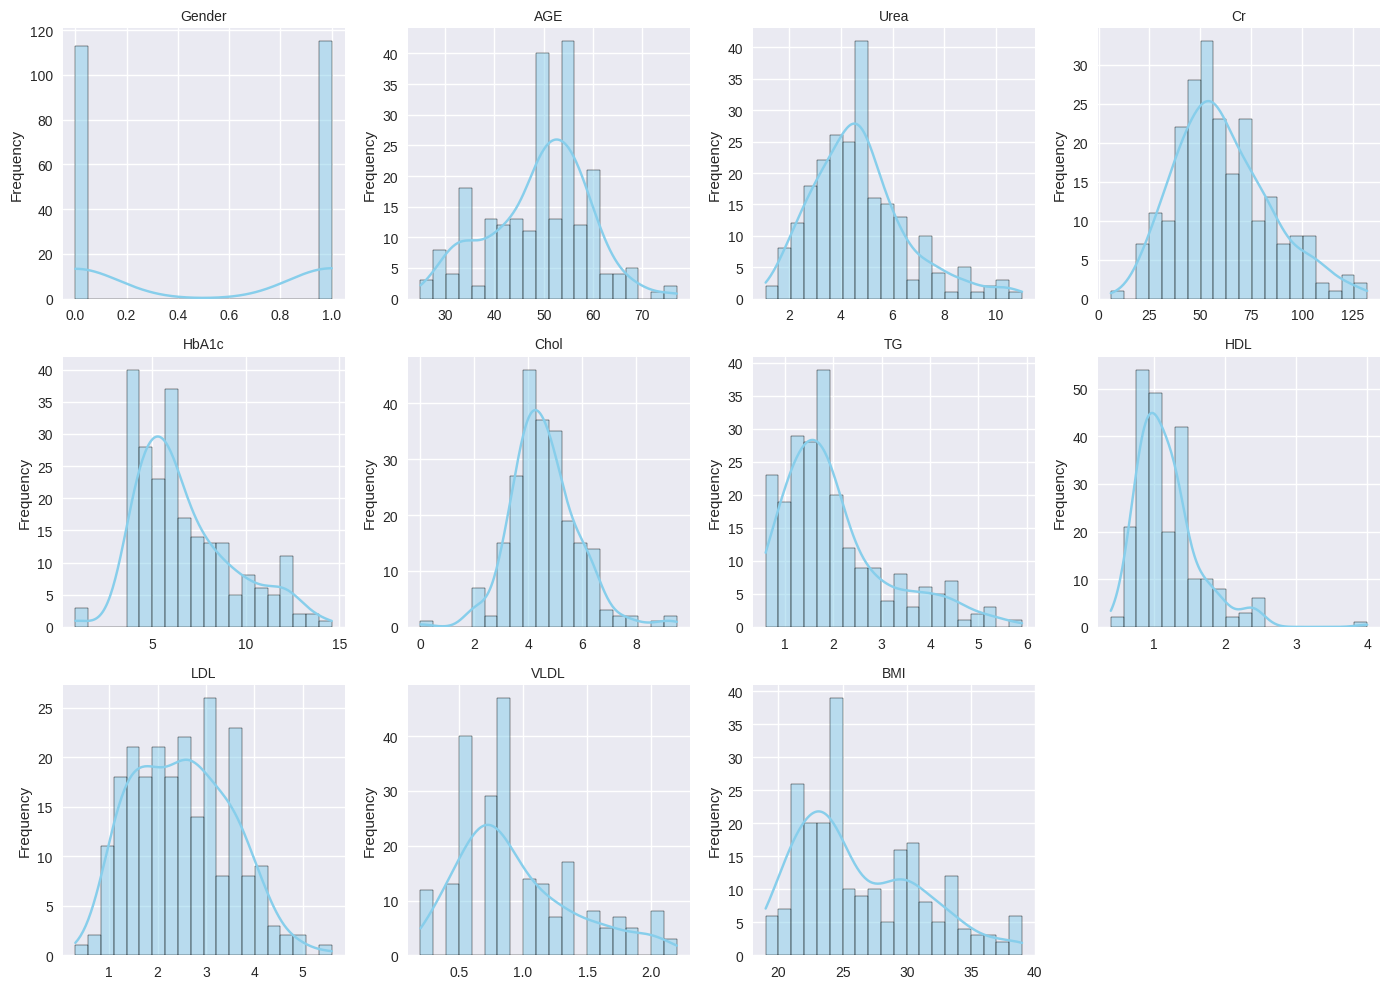

In [ ]:
# Define numeric columns (excluding target variable)
numeric_cols = df_clean.drop(columns=['Class']).columns

# Set up visualization style
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 10))

# Plot histograms for all numeric features
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_clean[col], kde=True, color='skyblue', bins=20)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##4.2 Bivariate Analysis
Tahap Bivariate Analysis dilakukan untuk memahami hubungan antar variabel dalam dataset, terutama antara fitur-fitur numerik dengan target variable (Class).
Analisis ini membantu mengidentifikasi pola korelasi, potensi multikolinearitas, serta variabel yang memiliki pengaruh kuat terhadap klasifikasi diabetes.

Visualisasi seperti correlation heatmap digunakan untuk menilai kekuatan dan arah hubungan antar variabel numerik.

###4.2.1 Relationship beetwen Numeric and Class

In [ ]:
# --- 4.2.1 Relationship Between Features and Class (numeric → categorical) ---

# Function to plot boxplot between feature and Class
def plot_feature_vs_class(df, feature, target='Class'):
    """
    Visualize the relationship between a numeric feature and the target class.
    Displays only a boxplot to compare feature distributions across classes.
    """
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.suptitle(f'{feature} vs {target}', fontsize=14, fontweight='bold')

    # Boxplot
    sns.boxplot(data=df, x=target, y=feature, palette='Set3', ax=ax)
    ax.set_title('Boxplot')
    ax.set_xlabel(target)
    ax.set_ylabel(feature)

    plt.tight_layout()
    plt.show()


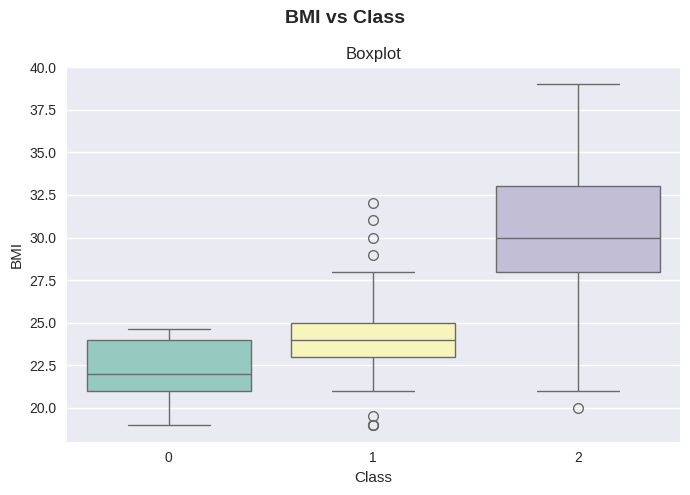

In [ ]:
plot_feature_vs_class(df_clean, 'BMI')


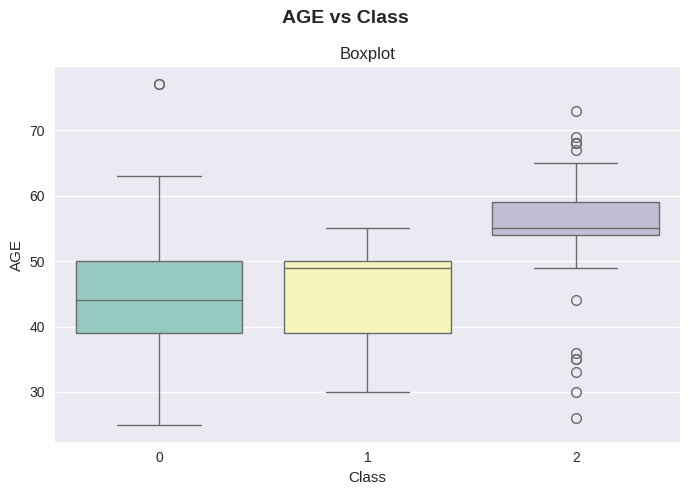

In [ ]:
plot_feature_vs_class(df_clean, 'AGE')

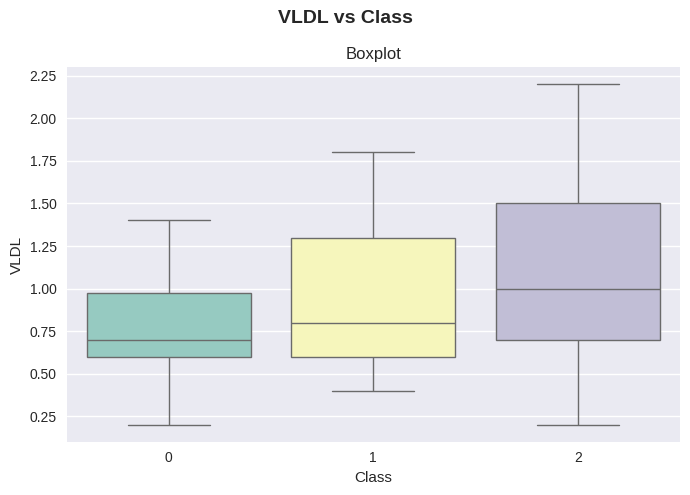

In [ ]:
plot_feature_vs_class(df_clean, 'VLDL')

VLDL punya korelasi positif yang terlihat secara visual dengan tingkat diabetes → kemungkinan faktor signifikan. Memiliki indikasi yang jelas dari tiap class, median semakin meningkat.

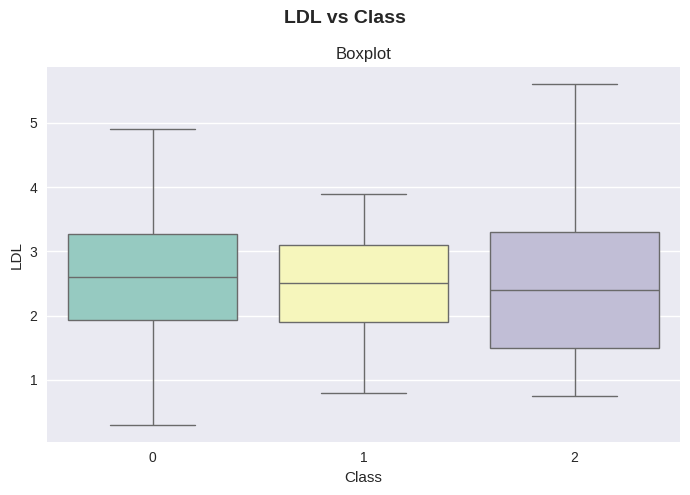

In [ ]:
plot_feature_vs_class(df_clean, 'LDL')

Berbeda dengan VLDL, LDL tidak menunjukkan pola jelas, sehingga kemungkinan kurang berpengaruh langsung terhadap klasifikasi diabetes dalam dataset ini. Bisa dilihat dari median dari tiap kelas tidak memiliki perbedaan yang signigikan

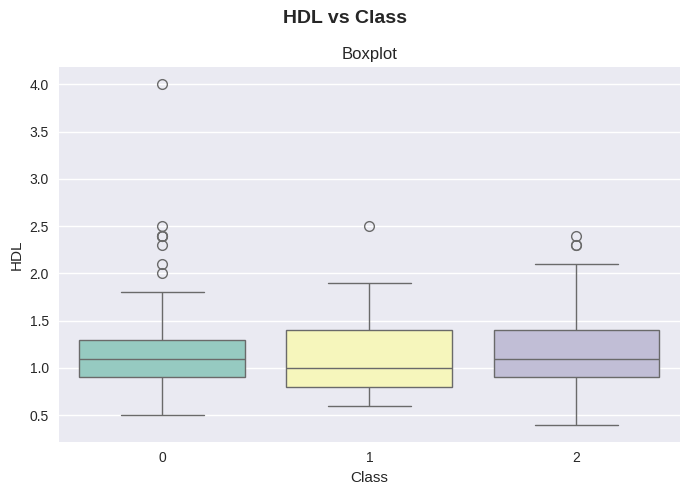

In [ ]:
plot_feature_vs_class(df_clean, 'HDL')

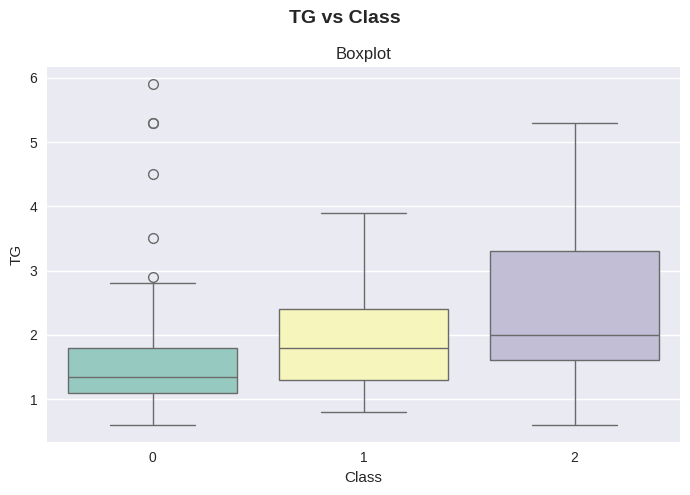

In [ ]:
plot_feature_vs_class(df_clean, 'TG')

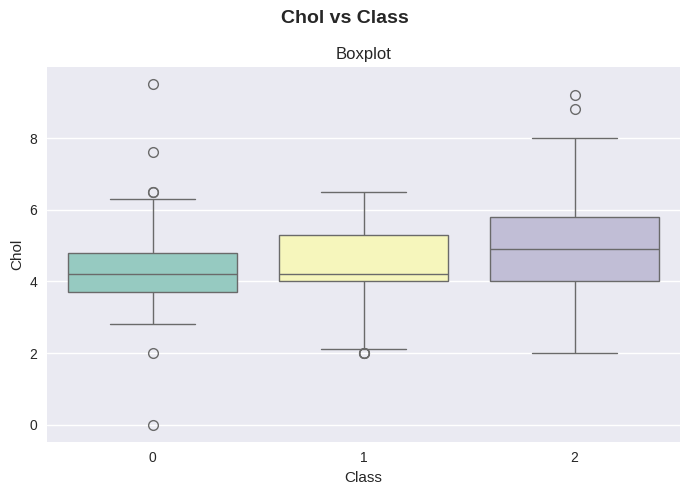

In [ ]:
plot_feature_vs_class(df_clean, 'Chol')

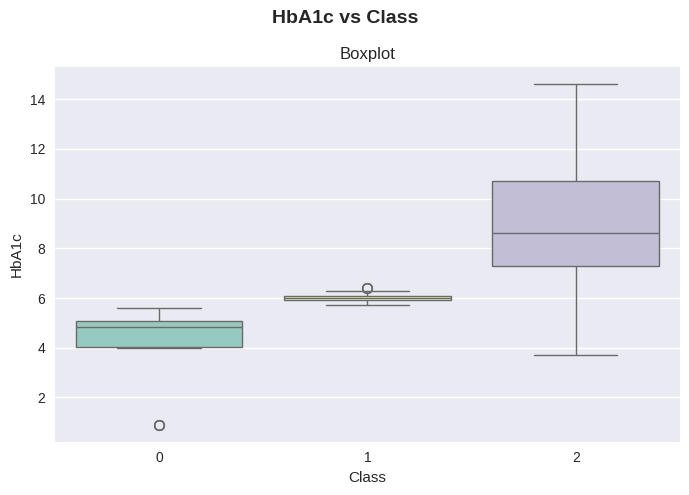

In [ ]:
plot_feature_vs_class(df_clean, 'HbA1c')

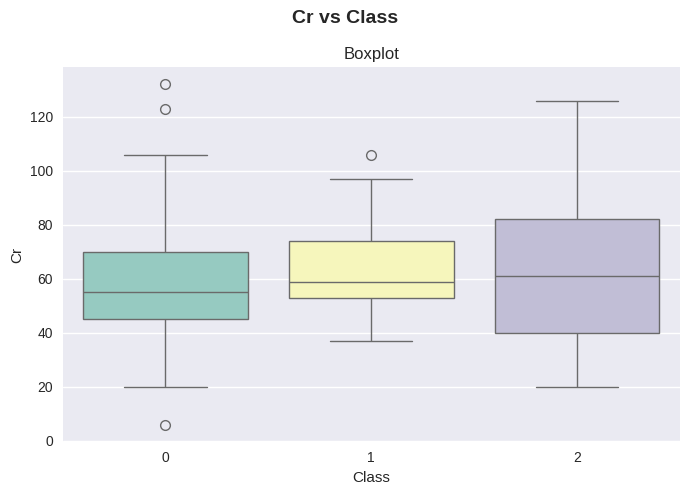

In [ ]:
plot_feature_vs_class(df_clean, 'Cr')

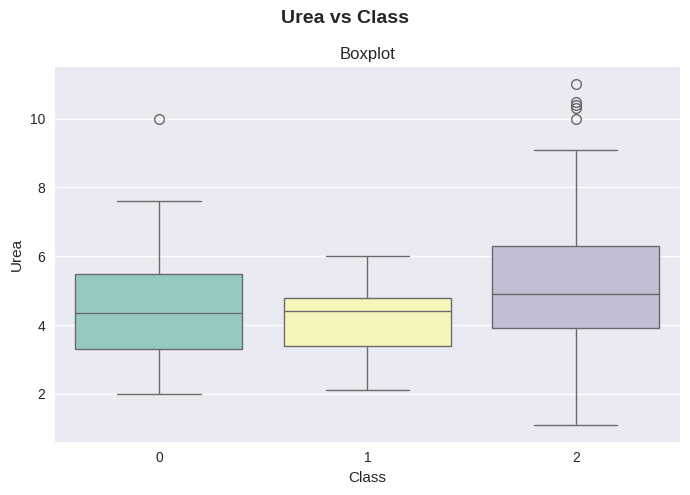

In [ ]:
plot_feature_vs_class(df_clean, 'Urea')

“Kelompok Predict Diabetic (02) menunjukkan pola nilai klinis yang lebih tinggi pada beberapa indikator metabolik (BMI, TG, Urea, Creatine, HbA1c, Chol, VLDL, Age) dibanding Non-Diabetic, namun belum separah kelompok Diabetic. Hal ini memperkuat perannya sebagai kelas transisi yang mengindikasikan risiko diabetes di masa depan.”

###4.2.2 Relationship beetwen categorial and class

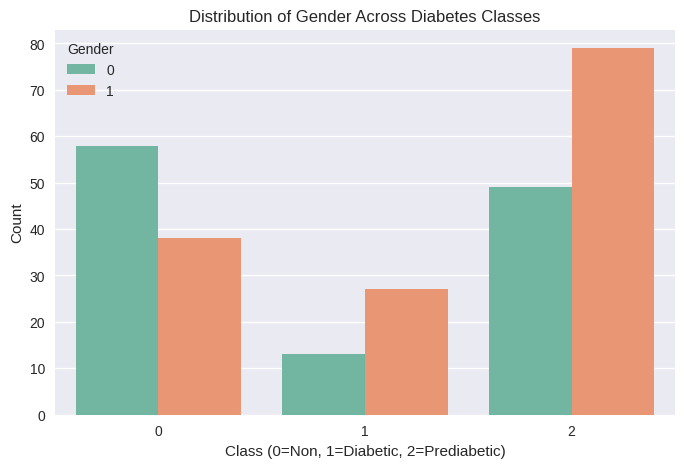

In [ ]:
#Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Class', hue='Gender', palette='Set2')
plt.title("Distribution of Gender Across Diabetes Classes")
plt.xlabel("Class (0=Non, 1=Diabetic, 2=Prediabetic)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()


Berdasarkan diagram menggambarkan bahwa kebanyakan yang terkena diabetes adalah laki-laki. Sedangkan perempuan lebih banyak yang tidak terindikasi diabetes

In [ ]:
# Function to plot boxplot between Gender and a selected feature, grouped by Class
def plot_gender_vs_feature(df, feature, target='Class'):
    """
    Visualize the relationship between Gender, a numeric feature, and the target class.
    Displays a boxplot comparing feature distributions across genders and classes.
    """

    fig, ax = plt.subplots(figsize=(8, 5))
    fig.suptitle(f'{feature} by Gender and {target}', fontsize=14, fontweight='bold')

    # Boxplot visualization
    sns.boxplot(
        data=df,
        x='Gender',
        y=feature,
        hue=target,
        palette='Set3',
        ax=ax
    )

    # Axis and legend formatting
    ax.set_title('Boxplot')
    ax.set_xlabel('Gender')
    ax.set_ylabel(feature)
    ax.legend(title=target)

    plt.tight_layout()
    plt.show()


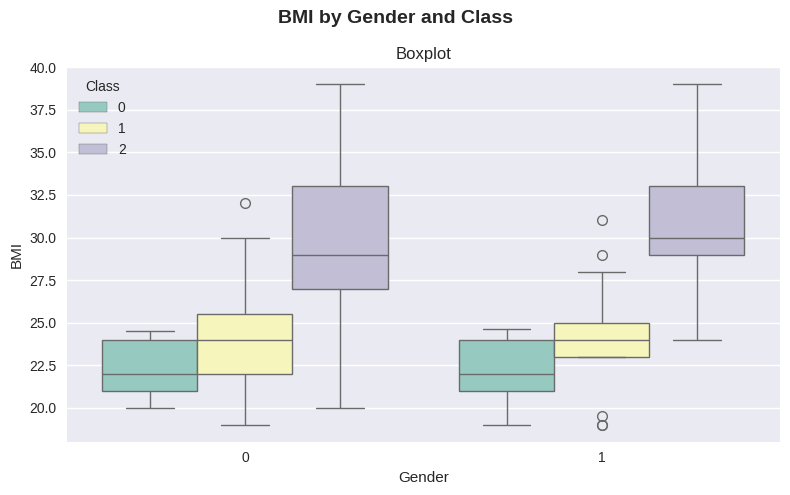

In [ ]:
plot_gender_vs_feature(df_clean, 'BMI')

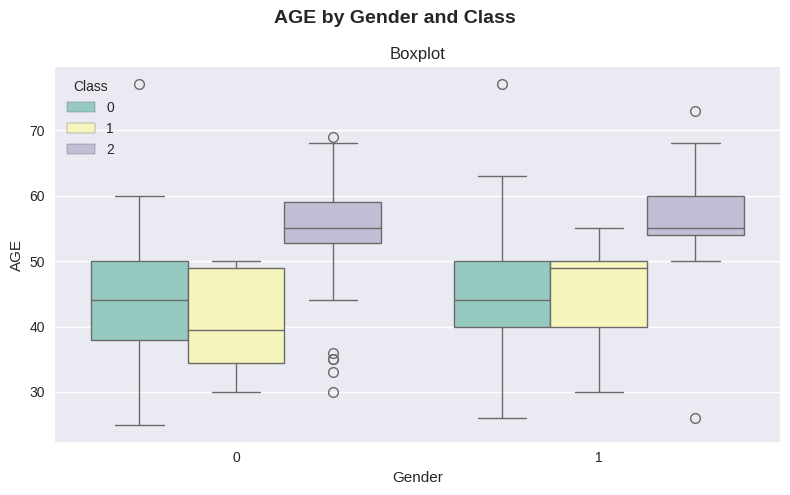

In [ ]:
plot_gender_vs_feature(df_clean, 'AGE')

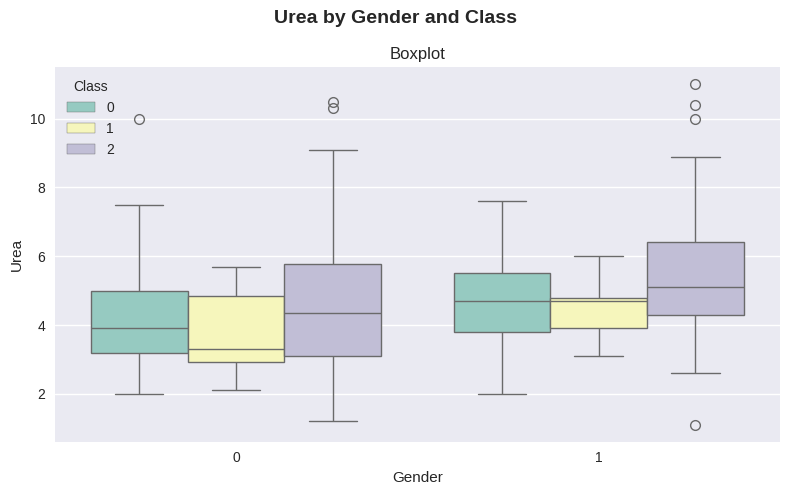

In [ ]:
plot_gender_vs_feature(df_clean, 'Urea')

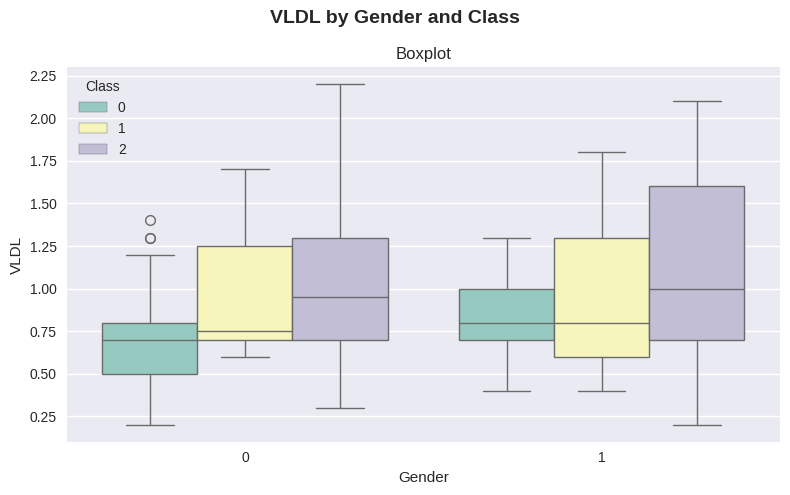

In [ ]:
plot_gender_vs_feature(df_clean, 'VLDL')

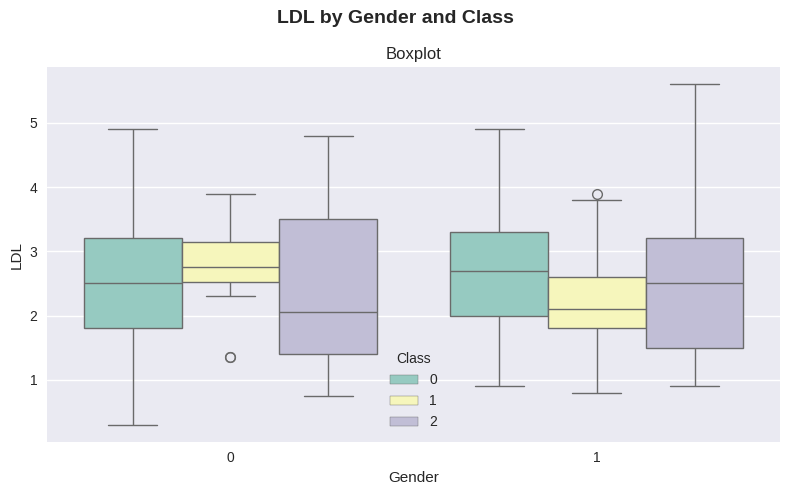

In [ ]:
plot_gender_vs_feature(df_clean, 'LDL')

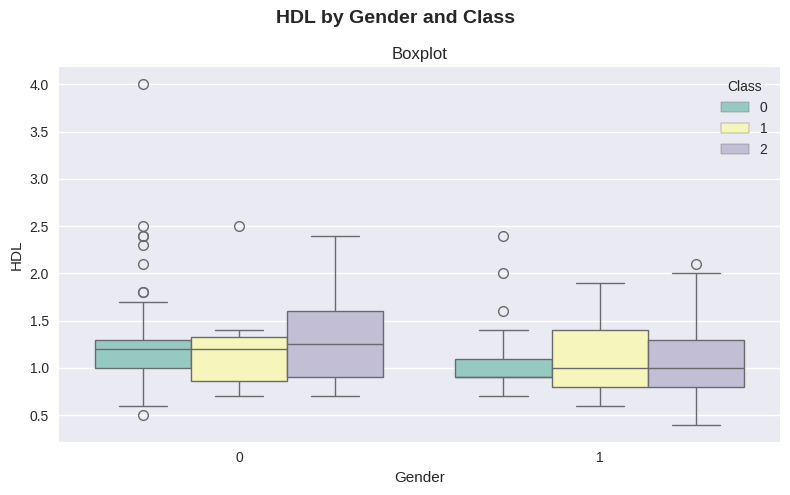

In [ ]:
plot_gender_vs_feature(df_clean, 'HDL')

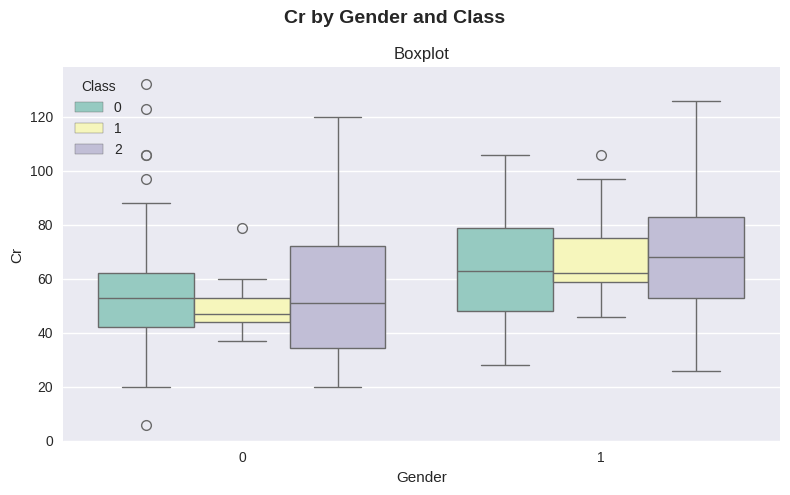

In [ ]:
plot_gender_vs_feature(df_clean, 'Cr')

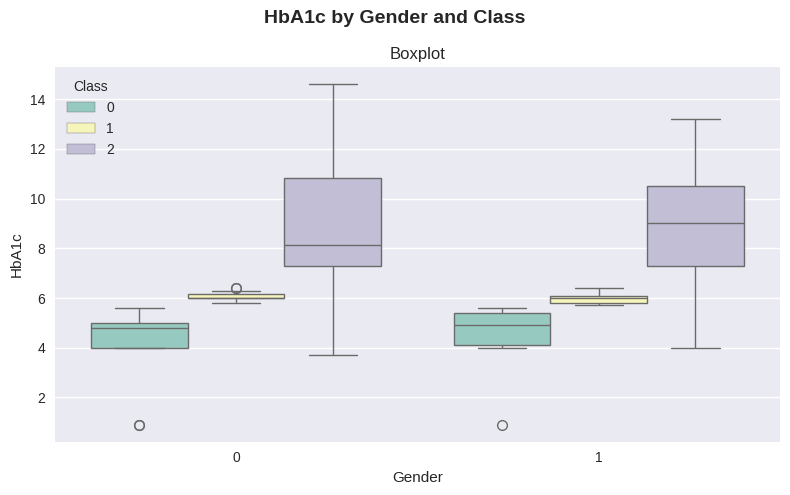

In [ ]:
plot_gender_vs_feature(df_clean, 'HbA1c')

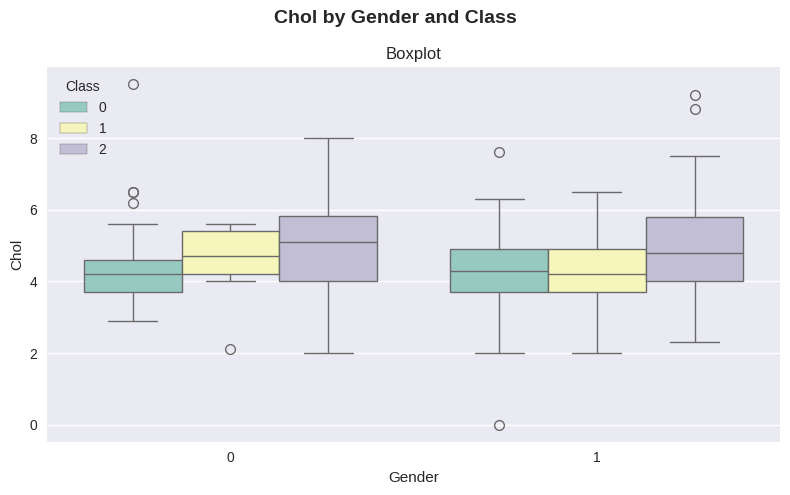

In [ ]:
plot_gender_vs_feature(df_clean, 'Chol')

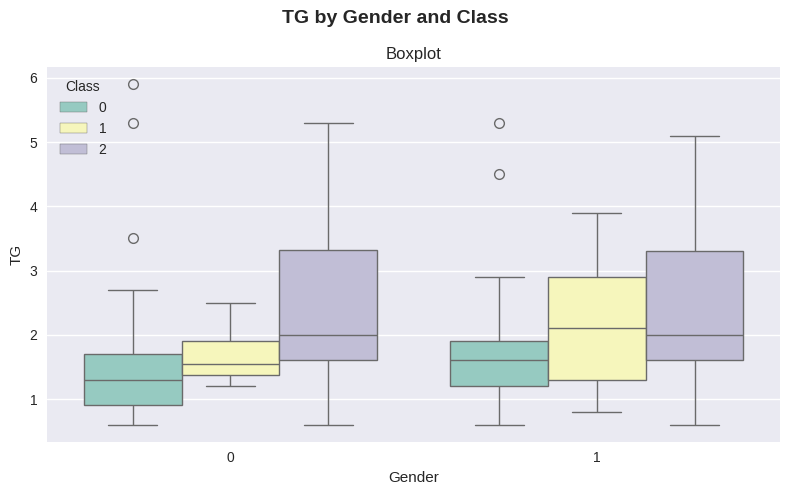

In [ ]:
plot_gender_vs_feature(df_clean, 'TG')

Pada fase pra-diabetes (Predict Diabetic), tubuh masih berusaha “melawan” resistensi insulin. Akibatnya, kadar glukosa, trigliserida, dan lemak tubuh (BMI) justru meningkat tajam karena sistem metabolisme belum rusak total.

Begitu seseorang benar-benar masuk fase diabetes (Class 1), banyak dari mereka sudah menjalani pengobatan, diet, atau kehilangan berat badan karena komplikasi metabolik.
→ Akibatnya, beberapa indikator (seperti BMI, TG, bahkan HDL) bisa menurun kembali setelah diagnosis.

Jadi, nilai “lebih tinggi” di Predict Diabetic itu bukan berarti mereka “lebih parah” dari penderita diabetes, tapi lebih karena mereka sedang dalam fase puncak metabolik abnormal — tubuh belum kolaps, tapi sudah mulai menunjukkan ketidakseimbangan besar.

##4.3 Target Variable Analysis

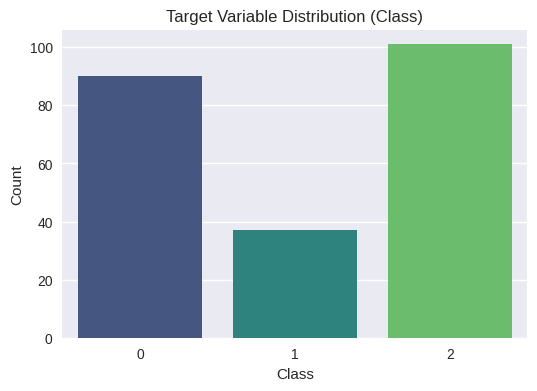

Class
2    44.298246
0    39.473684
1    16.228070
Name: proportion, dtype: float64


In [ ]:
# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df_clean, palette='viridis')
plt.title('Target Variable Distribution (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Percentage breakdown
class_dist = df_clean['Class'].value_counts(normalize=True) * 100
print(class_dist)


Distribusi pada variabel target (Class) menunjukkan bahwa kelompok Predict Diabetic (Class = 2) mendominasi dataset dengan proporsi sebesar 44,3% dari total data, diikuti oleh Non-Diabetic (Class = 0) sebesar 39,5%, dan Diabetic (Class = 1) sebesar 16,2%.

Secara umum, distribusi ini masih tergolong seimbang meskipun terdapat perbedaan proporsi antar kelas. Komposisi tersebut mengindikasikan bahwa sebagian besar individu dalam dataset berada pada kondisi pra-diabetes atau berisiko tinggi untuk berkembang menjadi diabetes, bukan pada tahap yang sudah terdiagnosis secara penuh.

Fenomena ini juga selaras dengan hasil visualisasi sebelumnya, di mana beberapa fitur seperti BMI, Triglycerides (TG), Urea, Creatine, HbA1c, Chol, VLDL,dan Age menunjukkan median yang relatif tinggi pada kelas Predict Diabetic. Hal ini dapat dijelaskan oleh kecenderungan biologis bahwa individu dengan nilai BMI dan TG yang tinggi memiliki risiko metabolik yang lebih besar, sehingga secara medis wajar apabila mereka termasuk ke dalam kategori Predict Diabetic.

Secara statistik, kelas Predict Diabetic yang lebih besar juga berpengaruh terhadap posisi median global pada sejumlah variabel numerik, menyebabkan nilai tengah keseluruhan dataset bergeser ke arah distribusi kelompok ini. Temuan ini memperkuat dugaan bahwa kelas Predict Diabetic berfungsi sebagai kelas **transisi**, yang secara karakteristik berada di antara kelompok sehat (Non-Diabetic) dan kelompok penderita diabetes (Diabetic).

Implikasi untuk tahap modeling adalah pentingnya memperhatikan ukuran kelas Diabetic (Class = 1) yang lebih kecil agar model tidak bias terhadap kelas mayoritas. Oleh karena itu, teknik seperti stratified train-test splitting serta metrik evaluasi yang memperhitungkan keseimbangan antar kelas (misalnya macro F1-score) direkomendasikan untuk digunakan pada tahap selanjutnya.

#5. Feature Engineering

Tahap ini berfokus pada proses evaluasi dan seleksi fitur guna memastikan hanya variabel yang paling relevan dan informatif yang digunakan dalam tahap modeling.

Beberapa langkah yang dilakukan pada tahap ini meliputi:

* Mengidentifikasi fitur yang memiliki hubungan kuat terhadap variabel target (Class).

* Mengevaluasi keterkaitan antar fitur untuk menghindari redundansi informasi.

* Melakukan proses feature selection menggunakan metode Recursive Feature Elimination (RFE) untuk menentukan fitur dengan kontribusi prediktif tertinggi.


##5.1 Correlation Analysis

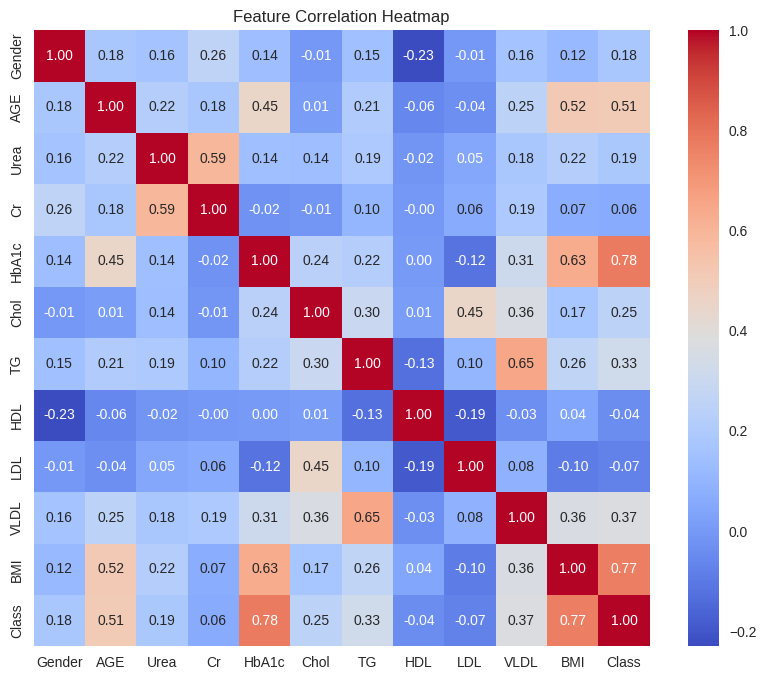

Class     1.000000
HbA1c     0.775650
BMI       0.767209
AGE       0.508611
VLDL      0.374786
TG        0.325863
Chol      0.248394
Urea      0.187619
Gender    0.177094
Cr        0.060902
HDL      -0.038880
LDL      -0.073495
Name: Class, dtype: float64


In [ ]:
# === Correlation Analysis ===
# Compute correlation matrix among numerical features
corr_matrix = df_clean.corr()

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display correlation of each feature with the target variable (Class)
target_corr = corr_matrix["Class"].sort_values(ascending=False)
print(target_corr)


## 5.2 Feature Selection (RFE Method)
🧩 Objective

Tujuan dari tahap ini adalah untuk mengidentifikasi fitur yang paling berpengaruh terhadap target variable (Class) dengan menggunakan metode Recursive Feature Elimination (RFE).
RFE bekerja dengan cara melatih model berulang kali dan secara bertahap menghapus fitur dengan kontribusi paling kecil, hingga diperoleh urutan fitur berdasarkan tingkat kepentingannya terhadap performa model.

In [ ]:
# ========================================
# FEATURE SELECTION USING RFE
# ========================================

# Separate features and target
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Initialize model (simple & efficient for small dataset)
model = LogisticRegression(max_iter=500, random_state=42)

# Initialize RFE (no specific n_features_to_select → rank all)
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X, y)

# Create dataframe with ranking results
rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values(by='Rank', ascending=True)

print(rfe_results)


   Feature  Rank  Selected
0   Gender     1      True
4    HbA1c     1      True
6       TG     1      True
9     VLDL     1      True
10     BMI     1      True
5     Chol     2     False
2     Urea     3     False
7      HDL     4     False
8      LDL     5     False
1      AGE     6     False
3       Cr     7     False


Berdasarkan hasil RFE, diperoleh lima fitur utama yang dipertahankan, yaitu:
Gender, HbA1c, TG, VLDL, dan BMI.
Kelima fitur ini dianggap memiliki kontribusi signifikan dalam menjelaskan variabel target (Class).

Menariknya, variabel AGE, yang sebelumnya memiliki korelasi cukup tinggi terhadap target (r = 0.50), tidak terpilih oleh RFE. Hal ini dapat dijelaskan oleh sifat multivariat dari metode RFE. Meskipun AGE memiliki hubungan yang kuat secara individu terhadap diabetes, informasi yang dibawanya kemungkinan sudah diwakili oleh variabel lain yang lebih kuat secara prediktif—seperti HbA1c dan BMI. Dengan kata lain, ketika fitur-fitur tersebut sudah dimasukkan ke model, kontribusi tambahan dari AGE menjadi relatif kecil.

Pendekatan ini memberikan keunggulan dibandingkan seleksi berbasis korelasi karena RFE tidak hanya melihat hubungan satu fitur terhadap target, tetapi juga mempertimbangkan keterkaitan dan redundansi antar fitur dalam konteks keseluruhan model.

#6. Data Spliting and Feature Scalling

Tahap ini bertujuan untuk membagi dataset menjadi data latih dan data uji dengan proporsi 80:20, serta melakukan standarisasi fitur menggunakan StandardScaler.
Karena proses RFE sebelumnya sudah menentukan fitur terbaik, maka hanya fitur-fitur terpilih saja yang digunakan dalam modeling.

##6.1 Data Spitting

In [ ]:
# 6.1 DATA SPLITTING
# ----------------------------------------------------
# Define features selected from RFE results
selected_features = ['Gender', 'HbA1c', 'TG', 'VLDL', 'BMI']

# Define X (features) and y (target variable)
X_selected = df_clean[selected_features]
y = df_clean['Class']

# Split dataset into train and test sets (80:20)
# Stratify ensures class proportions remain consistent
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


##6.2 Feature Scalling

In [ ]:
# 6.2 FEATURE SCALING
# ----------------------------------------------------

# Initialize scaler
scaler = StandardScaler()

# Fit scaler only on training data (to avoid data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=selected_features, index=X_test.index)


Pada tahap ini, dilakukan proses pembagian dataset menjadi dua bagian, yaitu data latih (80%) dan data uji (20%), dengan mempertahankan proporsi kelas menggunakan teknik stratified split.
Setelah itu, dilakukan standarisasi fitur menggunakan StandardScaler untuk menyamakan skala antar variabel numerik.
Proses fit hanya dilakukan pada data latih untuk menghindari kebocoran data (data leakage), sedangkan data uji ditransformasi menggunakan parameter hasil fit dari data latih.
Hasil dari tahap ini adalah dataset yang telah siap digunakan pada proses pemodelan.

#7. Modeling

Pada tahap ini, beberapa model akan diuji:

* Logistic Regression → sebagai baseline model yang interpretatif dan cepat dilatih.

* Random Forest → model berbasis ensemble yang kuat terhadap non-linearitas.

* Gradient Boosting → model yang biasanya memberikan performa tinggi melalui pendekatan boosting.

Seluruh model menggunakan parameter class_weight='balanced' agar dapat menyesuaikan bobot pelatihan terhadap distribusi kelas yang tidak seimbang.
Pendekatan ini dipilih untuk menghindari penggunaan data sintetis (seperti SMOTE) yang kurang direkomendasikan dalam konteks data kesehatan.

##7.1 Model Training and Tuning

In [ ]:
# =========================================
# 7.1 Model Training and Tuning
# =========================================

# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Define multiple models
models = {
    "Logistic Regression": LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        class_weight='balanced',
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    )
}

##7.2 Model Evaluation

In [ ]:
results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...\n")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    # Classification report (Precision, Recall, F1)
    print(classification_report(
        y_test, y_pred, target_names=['Non-Diabetic (0)',
                                      'Diabetic (1)',
                                      'Prediabetic (2)']
    ))

    # Calculate, ROC-AUC for multiclass (One-vs-Rest), macro recall, and macro F1
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    macro_recall = recall_score(y_test, y_pred, average='macro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Macro Recall: {macro_recall:.3f}")
    print(f"Macro F1-score: {macro_f1:.3f}")
    print(f"Macro ROC-AUC: {auc:.3f}")
    print("-" * 60)

    results[name] = {
        "Macro Recall": macro_recall,
        "Macro F1": macro_f1,
        "Macro ROC-AUC": auc
    }

# Display summary results
results_df = pd.DataFrame(results).T
results_df

Evaluating Logistic Regression...

                  precision    recall  f1-score   support

Non-Diabetic (0)       0.89      0.89      0.89        18
    Diabetic (1)       0.67      1.00      0.80         8
 Prediabetic (2)       1.00      0.80      0.89        20

        accuracy                           0.87        46
       macro avg       0.85      0.90      0.86        46
    weighted avg       0.90      0.87      0.87        46

Macro Recall: 0.896
Macro F1-score: 0.859
Macro ROC-AUC: 0.953
------------------------------------------------------------
Evaluating Random Forest...

                  precision    recall  f1-score   support

Non-Diabetic (0)       0.90      1.00      0.95        18
    Diabetic (1)       0.89      1.00      0.94         8
 Prediabetic (2)       1.00      0.85      0.92        20

        accuracy                           0.93        46
       macro avg       0.93      0.95      0.94        46
    weighted avg       0.94      0.93      0.93      

,Macro Recall,Macro F1,Macro ROC-AUC
Logistic Regression,0.896296,0.859259,0.952586
Random Forest,0.950000,0.935821,0.985111
Gradient Boosting,0.950000,0.935821,0.964929


Berdasarkan hasil evaluasi, model Random Forest dan Gradient Boosting menunjukkan performa yang paling baik dengan macro recall sebesar 0.95, macro F1-score sebesar 0.936, dan ROC-AUC di atas 0.96.

Sementara Logistic Regression memiliki performa lebih rendah, khususnya pada kelas “Prediabetic” (recall hanya 0.80), yang menunjukkan keterbatasannya dalam mengenali variasi antar kelas pada dataset yang tidak seimbang.

Karena domain dataset ini adalah **kesehatan (diabetes)**, di mana recall penting untuk meminimalkan risiko false negative (pasien diabetes tidak terdeteksi), maka **Random Forest dipilih sebagai model terbaik** karena memiliki macro recall tertinggi (0.95) dan kemampuan pemisahan kelas terbaik (ROC-AUC = 0.985).

##7.3 Model Validation (Cross-Validation)
Tujuan tahap ini adalah memastikan model yang dikembangkan tidak overfitting dan memiliki generalization performance yang stabil pada data baru.
Meskipun performa model terlihat tinggi pada test set, hal tersebut belum menjamin bahwa model akan konsisten saat diterapkan pada data berbeda.
Untuk itu dilakukan validasi tambahan menggunakan k-fold cross-validation pada data training.

Dalam proyek ini digunakan 5-fold cross-validation dengan metrik macro F1-score, karena dataset bersifat imbalanced dan memiliki lebih dari dua kelas.

🔍 5-Fold Cross Validation Results (Macro F1-Score)
Fold 1: 0.9636
Fold 2: 0.9636
Fold 3: 0.9534
Fold 4: 0.9556
Fold 5: 0.9302
------------------------------------------------------------
Mean F1 (macro): 0.9533
Standard Deviation: 0.0123


,Fold,Macro F1-Score
0,Fold 1,0.963606
1,Fold 2,0.963606
2,Fold 3,0.953439
3,Fold 4,0.955556
4,Fold 5,0.930159


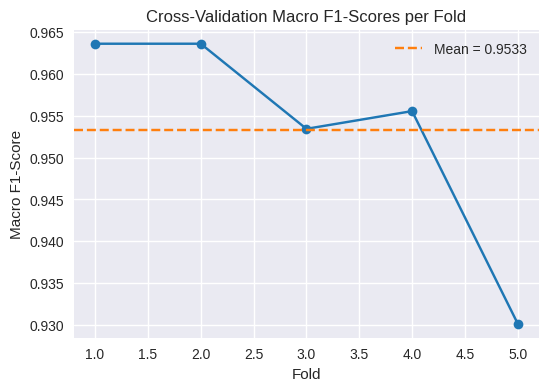

In [ ]:
# Pilih model terbaik (contoh: Random Forest)
best_model = models["Random Forest"]

# 5-Fold Cross Validation dengan metrik macro F1-score
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# === Tampilkan hasil CV dengan format lebih informatif ===
print("="*60)
print("🔍 5-Fold Cross Validation Results (Macro F1-Score)")
print("="*60)
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")
print("-"*60)
print(f"Mean F1 (macro): {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print("="*60)

# === Opsional: tampilkan dalam bentuk tabel ===
cv_df = pd.DataFrame({
    'Fold': [f'Fold {i}' for i in range(1, len(cv_scores)+1)],
    'Macro F1-Score': cv_scores
})
display(cv_df)

# === Opsional: visualisasi sederhana ===
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='-', color='tab:blue')
plt.axhline(y=cv_scores.mean(), color='tab:orange', linestyle='--', label=f"Mean = {cv_scores.mean():.4f}")
plt.title("Cross-Validation Macro F1-Scores per Fold")
plt.xlabel("Fold")
plt.ylabel("Macro F1-Score")
plt.legend()
plt.grid(True)
plt.show()


Berdasarkan hasil **5-Fold Cross Validation**, model Random Forest menunjukkan performa yang konsisten dan stabil di seluruh fold dengan nilai rata-rata Macro F1-score sebesar ±0.95. Nilai ini sejalan dengan hasil pengujian pada test set, menandakan bahwa model tidak mengalami overfitting dan memiliki kemampuan generalisasi yang baik terhadap data baru. Dengan demikian, model Random Forest dinilai ***robust*** dan *layak digunakan* pada tahap analisis lebih lanjut.

#8. Model Evaluation Summary & Insight
📊 Model Evaluation Summary & Insights

Berdasarkan hasil evaluasi dan validasi model, dapat disimpulkan beberapa poin penting:

1.   Model Terbaik:
Model Random Forest menunjukkan performa paling stabil dan unggul dibandingkan model lain (Logistic Regression dan Gradient Boosting), dengan nilai:

* Macro F1-score: ~0.94

* Macro Recall: ~0.95

* ROC-AUC: ~0.98

Nilai ini juga konsisten dengan hasil cross-validation, yang berarti model memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting signifikan.

2.  Relevansi Macro F1-score:
Karena dataset bersifat imbalanced dan memiliki lebih dari dua kelas, penggunaan Macro F1-score lebih tepat dibanding accuracy.

* Macro average memperlakukan setiap kelas sama pentingnya, sehingga kinerja terhadap kelas minoritas tetap diperhitungkan dengan adil.

* Ini mencegah bias terhadap kelas dengan jumlah data dominan (misalnya kelas “Non-Diabetic”).

3.  Interpretasi ROC-AUC Multiclass:
Dengan pendekatan One-vs-Rest (OvR), nilai ROC-AUC > 0.95 menunjukkan bahwa model mampu membedakan tiap kelas (Non-Diabetic, Diabetic, Prediabetic) dengan baik secara keseluruhan.

4.  Insight Praktis:

✳️ Model Random Forest dapat menjadi kandidat kuat untuk implementasi awal sistem deteksi dini kondisi diabetes.
